In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
class PCA:
    def __init__(self, number_components):
        self.n = number_components
        
    def fit(self, X):
        
        #Calculate the mean vector, then subtract the data points for 
        #that vector to standardize 
        X = X - np.mean(X, axis = 0)
        
        #Covariance Matrix
        cov_mat = np.cov(X.T)
        
        #Eigenvalue and Eigenvectors
        eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
        
        #Get the index of the eigenvalue from large to small
        idxs = np.argsort(eigen_values)[::-1]
        
        #Sort the eigenvalues and eigenvectors
        eigen_values = eigen_values[idxs]
        eigen_vectos = eigen_vectors.T
        eigen_vectors = eigen_vectors[idxs]
        
        #Select a subset of eigenvectors
        self.n = eigen_vectors[:self.n]
        
        #Explaned Variance
        total_variance = np.sum(eigen_values)
        exp_var_pcent = [(i/total_variance) * 100 for i in eigen_values]
        self.exp_variance = np.cumsum(exp_var_pcent)
        
        
    def transform(self, X):
        X = X - np.mean(X, axis = 0)
        return np.dot(X, self.n.T)
    
    
    def explained_variance(self):
        return self.exp_variance

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [4]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

In [5]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

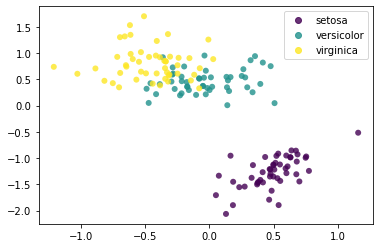

In [6]:
fig, ax = plt.subplots()
scatter = ax.scatter(x1, x2, c= y,edgecolor="none", alpha=0.8, 
                     cmap=plt.cm.get_cmap("viridis", 3))
ax.legend(handles= scatter.legend_elements()[0], 
          labels= list(target_names))
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

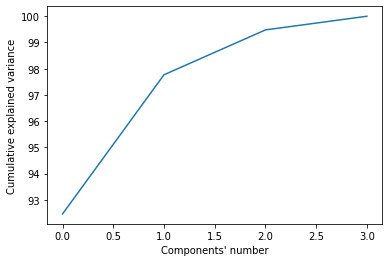

In [7]:
# Explained variance graph
fig1, ax1 = plt.subplots()
ax1.plot(pca.explained_variance(), label= "Explained Variance")
plt.xlabel("Components' number")
plt.ylabel('Cumulative explained variance')

In [8]:
from sklearn.decomposition import PCA
pca = PCA(2)  
X_projected = pca.fit_transform(iris.data)

In [9]:
pca = PCA() 
X_projected = pca.fit(iris.data)

Text(0, 0.5, 'Cumulative explained variance')

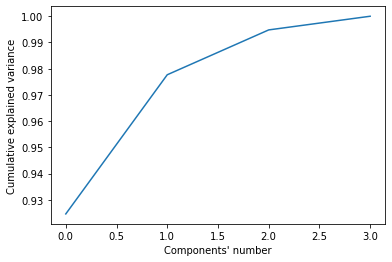

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components' number")
plt.ylabel('Cumulative explained variance')